In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2022-09-16 17:34:35.677885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 17:34:36.228311: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 17:34:36.228342: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-16 17:34:36.293193: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-16 17:34:37.425430: W tensorflow/stream_executor/platform/de

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalização de Pixels entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

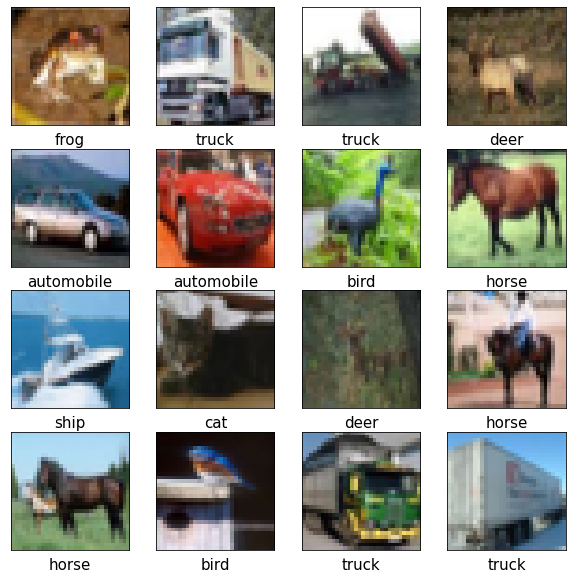

In [3]:
# Visualizando uma amostra dos dados
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i][0]], fontsize=15)
plt.show()

In [4]:
# normalize inputs
train_images_norm = train_images.astype(np.float32) / 255
test_images_norm = test_images.astype(np.float32) / 255
print(f'Min-max values of X_train: {np.min(train_images_norm),np.max(train_images_norm)}\n')

Min-max values of X_train: (0.0, 0.003921569)



In [5]:
# convert outputs to one-hot encodings
train_labels_onehot = keras.utils.to_categorical(train_labels, 10)
test_labels_onehot = keras.utils.to_categorical(test_labels, 10)

In [6]:
# train/val split
train_images_norm1, X_val, y_train_onehot1, y_val = train_test_split(
    train_images_norm, train_labels_onehot,
    test_size=0.2,
    random_state=42)

In [7]:
input_shape = (32, 32, 3)
num_classes = 10
model = keras.Sequential([
    keras.Input(input_shape),
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(num_classes, activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

2022-09-16 17:35:01.453524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-16 17:35:01.453987: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-16 17:35:01.454005: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (danilo): /proc/driver/nvidia/version does not exist
2022-09-16 17:35:01.454985: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=150, 
                    validation_data=(test_images, test_labels))

Epoch 1/150
1563/1563 [==============================] - 44s 28ms/step - loss: 1.7536 - accuracy: 0.3395 - val_loss: 1.4448 - val_accuracy: 0.4605
Epoch 2/150
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4536 - accuracy: 0.4694 - val_loss: 1.3114 - val_accuracy: 0.5153
Epoch 3/150
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3471 - accuracy: 0.5176 - val_loss: 1.1951 - val_accuracy: 0.5650
Epoch 4/150
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2770 - accuracy: 0.5459 - val_loss: 1.1218 - val_accuracy: 0.6051
Epoch 5/150
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2169 - accuracy: 0.5698 - val_loss: 1.1050 - val_accuracy: 0.6129
Epoch 6/150
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1800 - accuracy: 0.5847 - val_loss: 1.0511 - val_accuracy: 0.6273
Epoch 7/150
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1510 - accuracy: 0.5945 - val_loss: 1

1563/1563 [==============================] - 42s 27ms/step - loss: 0.8722 - accuracy: 0.7109 - val_loss: 0.8002 - val_accuracy: 0.7318
Epoch 57/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8695 - accuracy: 0.7131 - val_loss: 0.8157 - val_accuracy: 0.7232
Epoch 58/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8785 - accuracy: 0.7092 - val_loss: 0.7992 - val_accuracy: 0.7340
Epoch 59/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8691 - accuracy: 0.7118 - val_loss: 0.8166 - val_accuracy: 0.7258
Epoch 60/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8761 - accuracy: 0.7098 - val_loss: 0.7875 - val_accuracy: 0.7361
Epoch 61/150
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8786 - accuracy: 0.7089 - val_loss: 0.8149 - val_accuracy: 0.7301
Epoch 62/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8693 - accuracy: 0.7138 - val_loss: 0.7875 

1563/1563 [==============================] - 43s 27ms/step - loss: 0.8384 - accuracy: 0.7285 - val_loss: 0.7545 - val_accuracy: 0.7481
Epoch 112/150
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8309 - accuracy: 0.7300 - val_loss: 0.7649 - val_accuracy: 0.7456
Epoch 113/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8398 - accuracy: 0.7280 - val_loss: 0.7813 - val_accuracy: 0.7480
Epoch 114/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8404 - accuracy: 0.7275 - val_loss: 0.7569 - val_accuracy: 0.7526
Epoch 115/150
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8322 - accuracy: 0.7311 - val_loss: 0.7386 - val_accuracy: 0.7576
Epoch 116/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8394 - accuracy: 0.7293 - val_loss: 0.7519 - val_accuracy: 0.7514
Epoch 117/150
1563/1563 [==============================] - 42s 27ms/step - loss: 0.8422 - accuracy: 0.7277 - val_loss: 0

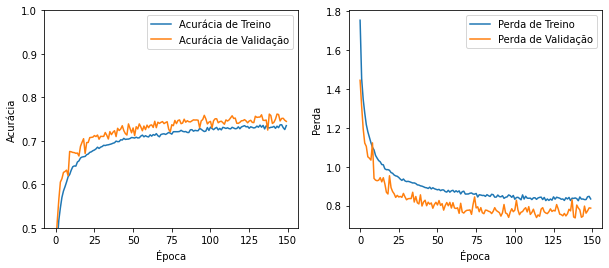

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label = 'Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.5, 1])
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label = 'Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.show()

In [13]:
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.7870564460754395
Test accuracy: 0.744700014591217
